## Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_weight = pd.read_csv('../dataset/weight-height.csv')
df_weight.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df_weight.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


Text(0.5, 1.0, 'Weight vs Height')

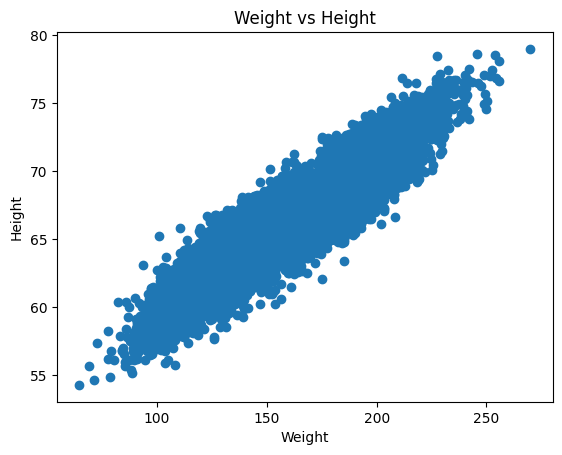

In [6]:
plt.scatter(df_weight['Weight'], df_weight['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')

## Independent & Dependent Variabel

In [9]:
x = df_weight.iloc[:, [1]].values  # Independent variable (Height)
y = df_weight.iloc[:, [2]].values  # Dependent variable (Weight)

## Split Test & Train dataset

In [10]:
from sklearn.model_selection import train_test_split
# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=6)

## Training Regresi -- Estimasi

In [11]:
from sklearn.linear_model import LinearRegression
# membuat model regresi
regresi = LinearRegression()

In [12]:
regresi.fit(x_train, y_train)  # Melatih model dengan data training

LinearRegression()

## Testing Regresi

In [13]:
y_estimasi = regresi.predict(x_test)  # Memprediksi nilai dengan data test

## Evaluasi Model

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score
# Evaluasi model
mae = mean_absolute_error(y_test, y_estimasi)
r2 = r2_score(y_test, y_estimasi)

In [20]:
print(f"MAE : ",mae)
print(f"R2 : ",r2)

MAE :  9.657611291024606
R2 :  0.8590709436465087


## Data Baru

In [21]:
data_baru = [[60]]
# Memprediksi data baru
y_baru_estimasi = regresi.predict(data_baru)
print(y_baru_estimasi)

[[112.40455148]]


## Visualisasi Data

Text(0, 0.5, 'Weight')

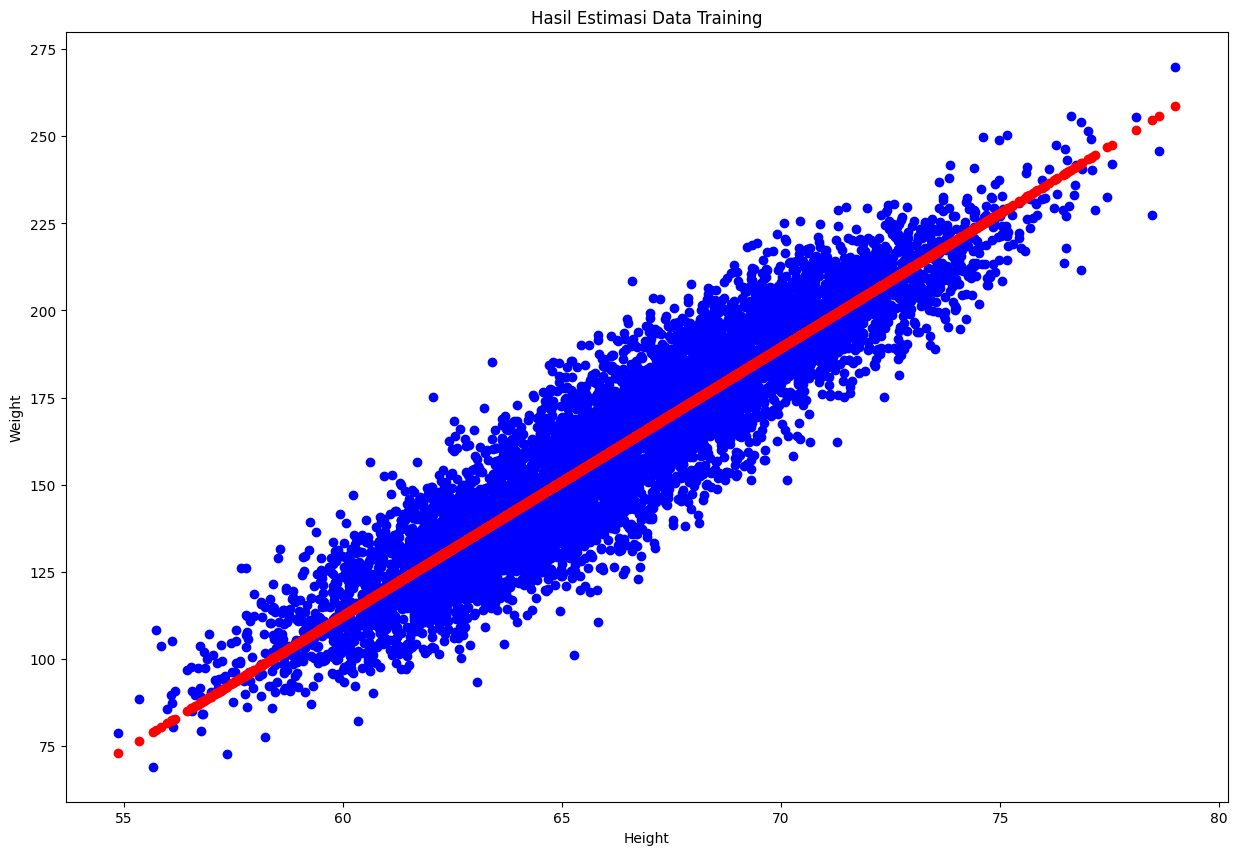

In [25]:
# Visualisasi Hasil estimasi data training
plt.figure(figsize=(15, 10))
plt.title("Hasil Estimasi Data Training")

# data observasi
plt.scatter(x_train, y_train, color='blue')

# data estimasi dari data training
plt.scatter(x_train, regresi.predict(x_train), color='red')

plt.xlabel('Height')
plt.ylabel('Weight')

Text(0, 0.5, 'Weight')

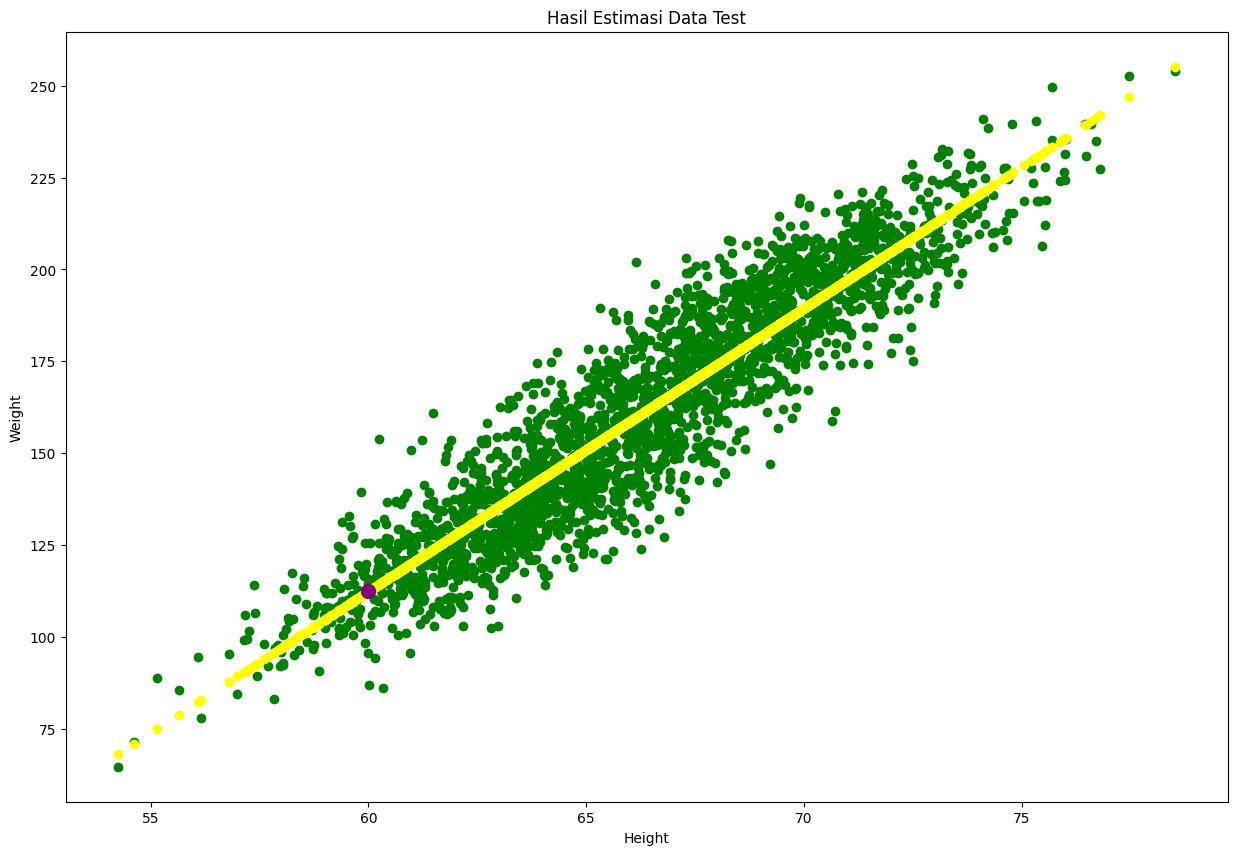

In [27]:
# Visualisasi Hasil estimasi data Test
plt.figure(figsize=(15, 10))
plt.title("Hasil Estimasi Data Test")

# data observasi
plt.scatter(x_test, y_test, color='green')

# data estimasi dari data Test
plt.scatter(x_test, y_estimasi, color='yellow')

# visualisasi hasil estimasi data baru
plt.scatter(data_baru, y_baru_estimasi, color='purple', s=100, label='Estimasi Data Baru')

plt.xlabel('Height')
plt.ylabel('Weight')